<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the given dataset**

In [23]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/ML Datasets/x_train.npy')
x_test = np.load('/content/drive/MyDrive/ML Datasets/x_test.npy')
y_train = np.load('/content/drive/MyDrive/ML Datasets/y_train.npy')
y_test = np.load('/content/drive/MyDrive/ML Datasets/y_test.npy')

In [24]:
x_train.shape, y_train.shape

((100, 1), (100,))

**Since the shape of y_trainig is not as same as the x_training, I am changing the shape of the y as same as X**

In [25]:
y_train =y_train.reshape(100,1)

In [26]:
x_train.shape, y_train.shape

((100, 1), (100, 1))

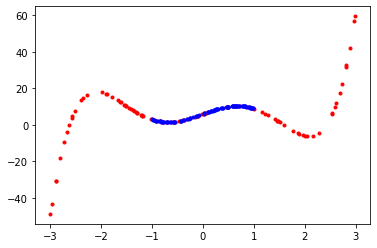

In [27]:
import matplotlib.pyplot as plt

plt.plot(x_train,y_train,'r.')
plt.plot(x_test,y_test,'b.')
plt.show()

# Linear Regression
**Preliminary Analysis**


By above plotting it is observed is data has some linearity between x and y values for both the datasets of training and testing. 

# Algorithm
**Since the data is very small, I am asuming we can achieve the linear equation usig gradient descent in no time with less number of iterations and less number of epochs.**

**So my approach is going to be Finding the predictions uing the Normal Equations**

****
**Finding Theta**
---
Equation for the normal equations is 

Theta = (X.T *X)-1 * X.T * y_hat


In [28]:
X_cap = np.append(x_train,np.ones((x_train.shape[0],1)),axis =1)

In [29]:
def theta(x,y):
  m,n = x.shape
  theta = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
  return theta

In [30]:
theta = theta(X_cap,y_train)
theta

array([[3.30656683],
       [6.19321416]])

In [36]:
def prediction(x_test, theta):
  x = np.append(x_test,np.ones((x_test.shape[0],1)),axis =1)
  predictions = np.dot(x,theta)
  return predictions


In [37]:
predicted_data = prediction(x_test,theta)

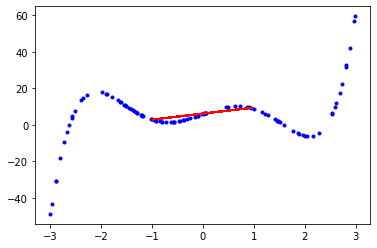

In [41]:
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,predicted_data,'r-')
plt.show()
